Modelo 1

In [109]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from nltk.tokenize import TweetTokenizer
import nltk

In [110]:
tf.__version__

'2.8.0'

In [111]:
df = pd.read_csv('tweets_nlp_modelling_v3.csv')
print(df.shape)
df.head()

(20565, 8)


,date_clean,tweets,cleaned_tweets,crypto_sentiment,subjectivity,polarity,sentiment,target
0,2021-02-06,"""Will Institutional Investment Keep Pouring In...",Will Institutional Investment Keep Pouring Int...,positive,0.0,0.0,positive,True
1,2021-02-06,BTC Bitcoin You know where the WSB money is g...,BTC Bitcoin You know WSB money going WallStree...,positive,0.0,0.0,positive,True
2,2021-02-06,"🔼🔼 ₿1 = $38,868 (00:56 UTC)\n$BTC prices conti...",UTC BTC price continue rise Change since midni...,positive,0.0,0.0,positive,True
3,2021-02-06,BTC Bitcoin All the way up! 🚀 🚀 💵 💵 /xVyLbbWRiu,BTC Bitcoin All way xVyLbbWRiu,positive,0.0,0.0,positive,True
4,2021-02-06,Keep going BTC bitcoin,Keep going BTC bitcoin,positive,0.0,0.0,positive,True


In [112]:
df['sentiment'].value_counts()

positive    11148
neutral      7173
negative     2244
Name: sentiment, dtype: int64

In [117]:
X = df['cleaned_tweets']
y = pd.get_dummies(df['crypto_sentiment'])
num_classes = df['target'].nunique()

In [118]:
seed = 38 # fix random seed for reproducibility
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16452,) (4113,) (16452, 2) (4113, 2)


In [119]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [120]:
from tensorflow.keras.preprocessing import sequence
max_words = 50
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(16452, 50) (4113, 50)


In [121]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 12, 32)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 100)               5

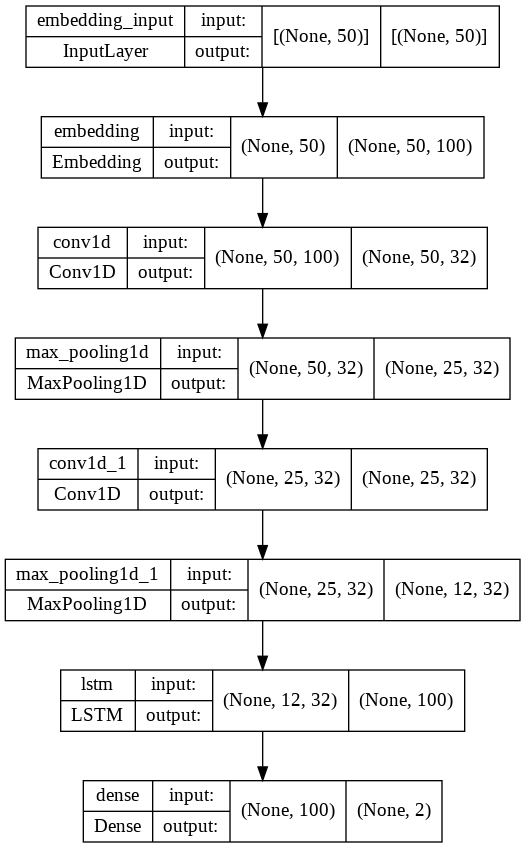

In [122]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [123]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
129/129 - 15s - loss: 0.6836 - accuracy: 0.5432 - val_loss: 0.6656 - val_accuracy: 0.5672 - 15s/epoch - 118ms/step
Epoch 2/10
129/129 - 11s - loss: 0.5640 - accuracy: 0.7078 - val_loss: 0.6710 - val_accuracy: 0.5947 - 11s/epoch - 86ms/step
Epoch 3/10
129/129 - 11s - loss: 0.3508 - accuracy: 0.8455 - val_loss: 0.8311 - val_accuracy: 0.5842 - 11s/epoch - 88ms/step
Epoch 4/10
129/129 - 11s - loss: 0.2026 - accuracy: 0.9165 - val_loss: 1.1235 - val_accuracy: 0.5947 - 11s/epoch - 86ms/step
Epoch 5/10
129/129 - 11s - loss: 0.1480 - accuracy: 0.9363 - val_loss: 1.1611 - val_accuracy: 0.5864 - 11s/epoch - 86ms/step
Epoch 6/10
129/129 - 11s - loss: 0.1137 - accuracy: 0.9501 - val_loss: 1.4359 - val_accuracy: 0.5818 - 11s/epoch - 86ms/step
Epoch 7/10
129/129 - 11s - loss: 0.0982 - accuracy: 0.9532 - val_loss: 1.4368 - val_accuracy: 0.5852 - 11s/epoch - 86ms/step
Epoch 8/10
129/129 - 11s - loss: 0.0859 - accuracy: 0.9582 - val_loss: 1.6305 - val_accuracy: 0.5932 - 11s/epoch - 87ms/step

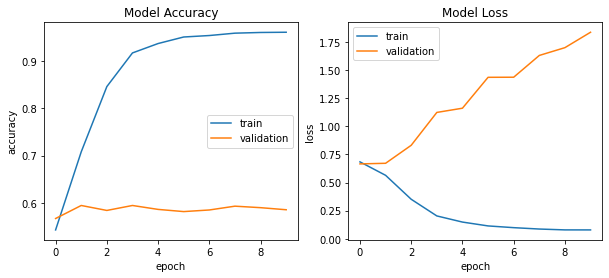

In [124]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

1    2107
0    2006
dtype: int64
0    2296
1    1817
dtype: int64


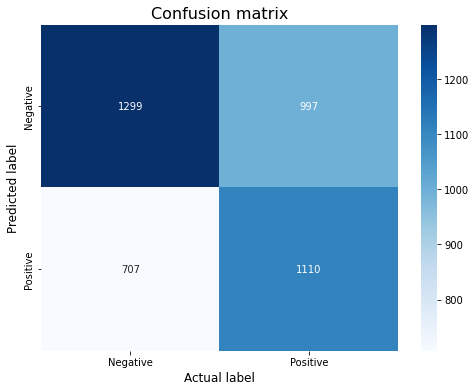

In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

Modelo 2

In [87]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleaned_tweets'][0])
X, tokenizer = tokenize_pad_sequences(df['cleaned_tweets'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 Will Institutional Investment Keep Pouring Into Bitcoin ehsnhs qEn btc bitcoin
After Tokenization & Padding 
 [ 300 1156  111  218 2915    1    2    1    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [88]:
y = pd.get_dummies(df['crypto_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (12339, 50) (12339, 2)
Validation Set:  (4113, 50) (4113, 2)
Test Set:  (4113, 50) (4113, 2)


In [89]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [91]:
vocab_size = 5000
embedding_size = 32
epochs = 50
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

In [92]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

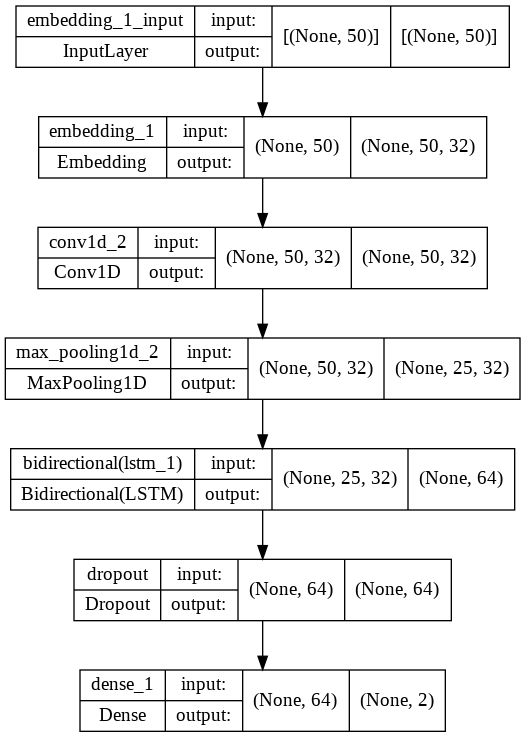

In [93]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [94]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [95]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/50
97/97 [==============================] - 9s 53ms/step - loss: 0.6935 - accuracy: 0.4968 - precision: 0.4968 - recall: 0.4968 - val_loss: 0.6927 - val_accuracy: 0.5159 - val_precision: 0.5159 - val_recall: 0.5159
Epoch 2/50
97/97 [==============================] - 4s 42ms/step - loss: 0.6934 - accuracy: 0.5037 - precision: 0.5037 - recall: 0.5037 - val_loss: 0.6925 - val_accuracy: 0.5159 - val_precision: 0.5159 - val_recall: 0.5159
Epoch 3/50
97/97 [==============================] - 4s 42ms/step - loss: 0.6931 - accuracy: 0.5088 - precision: 0.5088 - recall: 0.5088 - val_loss: 0.6929 - val_accuracy: 0.5162 - val_precision: 0.5162 - val_recall: 0.5162
Epoch 4/50
97/97 [==============================] - 7s 75ms/step - loss: 0.6931 - accuracy: 0.5095 - precision: 0.5095 - recall: 0.5095 - val_loss: 0.6924 - val_accuracy: 0.5159 - val_precision: 0.5159 - val_recall: 0.5159
Epoch 5/50
97/97 [==============================] - 4s 43ms/step - loss: 0.6929 - accuracy: 0.5093 - precisi

In [96]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.5378
Precision : 0.5378
Recall    : 0.5378
F1 Score  : 0.5378


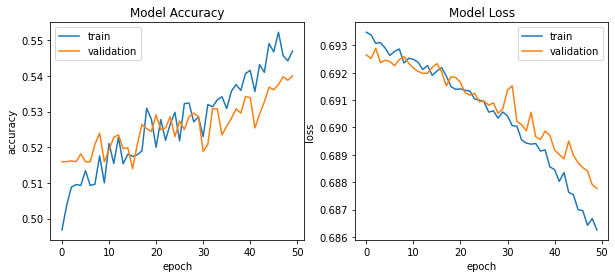

In [97]:
plot_training_hist(history)

1    2143
0    1970
dtype: int64
1    2808
0    1305
dtype: int64


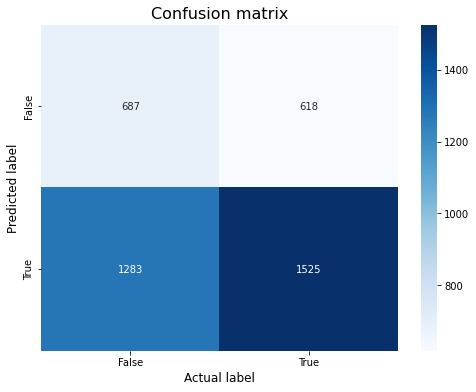

In [98]:
plot_confusion_matrix(model, X_test, y_test)